In [1]:
# Model Steps:

# 1-Training Data
# 2-Preprocessing
# 3-Arch.
# 4-Fine Tune, Pre-trained mode
# 5-Optimize Hyperparameters
# 6-Evalutaion
# 7-Deployv

In [47]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras import applications

In [48]:
train='D:/Final/Graduation project/datasets/casting_data/casting_data/train'
test='D:/Final/Graduation project/datasets/casting_data/casting_data/test'

In [76]:
trdata = ImageDataGenerator(rescale = 1 / 255.0,
        rotation_range = 20,
        zoom_range = 0.05,
        width_shift_range = 0.05,
        height_shift_range = 0.05,
        shear_range = 0.05,
        horizontal_flip = True,
        fill_mode = "nearest",
        validation_split = 0.20)

traindata = trdata.flow_from_directory(directory=train , target_size=(224,224), subset='training',
                                       shuffle=True,color_mode='rgb',class_mode='categorical')

valid_generator = trdata.flow_from_directory(
    directory=train,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=3 ,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
)

tsdata = ImageDataGenerator(rescale= 1/255.0)
testdata = tsdata.flow_from_directory(directory=test, target_size=(224,224),color_mode='rgb',
                                      batch_size=1,class_mode=None,shuffle=False,)

Found 6230 images belonging to 2 classes.
Found 1557 images belonging to 2 classes.
Found 240 images belonging to 1 classes.


In [77]:
VGG = keras.applications.vgg16.VGG16(input_shape=(224,224,3), include_top = False, weights='imagenet')

In [78]:
VGG.trainable = False
#Not train the front 13 layers, train only last two layers

In [79]:
model = keras.Sequential([
    VGG,
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation="relu"),
    keras.layers.Dense(units=256, activation="relu"),
    keras.layers.Dense(units=2, activation="softmax"), 
])

In [80]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dense_15 (Dense)            (None, 256)               6422784   
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 dense_17 (Dense)            (None, 2)                 514       
                                                                 
Total params: 21,203,778
Trainable params: 6,489,090
Non-trainable params: 14,714,688
_________________________________________________________________


In [84]:
hist = model.fit(traindata , steps_per_epoch = 100  , epochs = 5 , #traindata.n 
                           validation_data = valid_generator, validation_steps = 519)
model.save('vggclf_v3.h5')

Epoch 1/5
100/100 [==============================] - 1428s 14s/step - loss: 0.6053 - accuracy: 0.7803 - val_loss: 0.2964 - val_accuracy: 0.8606
Epoch 2/5
100/100 [==============================] - 1283s 13s/step - loss: 0.1818 - accuracy: 0.9251 - val_loss: 0.0605 - val_accuracy: 0.9904
Epoch 3/5
100/100 [==============================] - 1137s 11s/step - loss: 0.0875 - accuracy: 0.9693 - val_loss: 0.0704 - val_accuracy: 0.9820
Epoch 4/5
100/100 [==============================] - 1113s 11s/step - loss: 0.0876 - accuracy: 0.9696 - val_loss: 0.0866 - val_accuracy: 0.9679
Epoch 5/5
100/100 [==============================] - 1221s 12s/step - loss: 0.0744 - accuracy: 0.9762 - val_loss: 0.1447 - val_accuracy: 0.9441


In [86]:
model.evaluate(valid_generator,
steps=valid_generator.n)


1557/1557 [==============================] - 341s 219ms/step - loss: 0.1454 - accuracy: 0.9454


[0.14540192484855652, 0.9454078078269958]

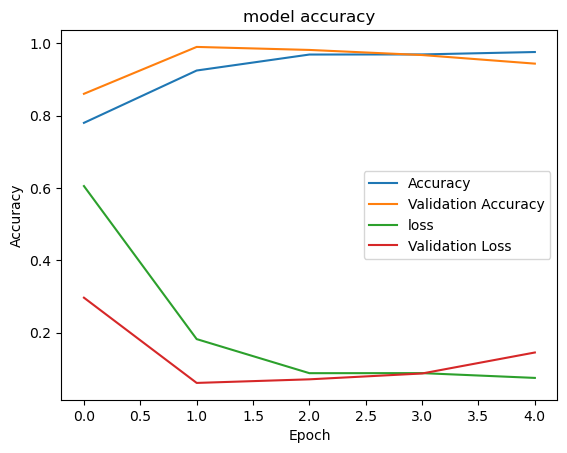

In [87]:

import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()


In [88]:
pred=model.predict(testdata,steps = testdata.n, verbose = 1)

240/240 [==============================] - 57s 235ms/step


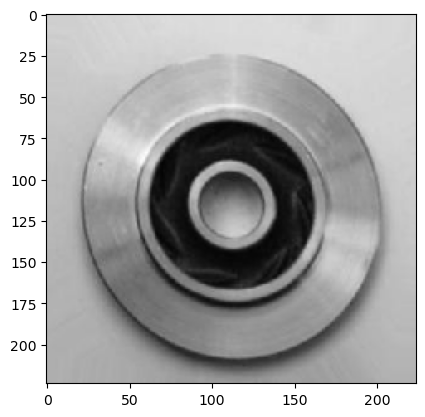

In [91]:
from keras.preprocessing import image
img = keras.utils.load_img("D:/Final/Graduation project/datasets/casting_data/casting_data/test/predict/cast_ok_0_175.jpeg",target_size=(224,224))
img = np.asarray(img)

plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [92]:
from keras.models import load_model
saved_model = load_model("vggclf.h5")
output = model.predict(img)
if output[0][0] > output[0][1]:
    print("defected")
    print(output)
else:
    print("good")
    print(output)

1/1 [==============================] - 0s 187ms/step
defected
[[1.0000000e+00 3.5993016e-28]]


In [93]:
import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(model)
model_from_pickle = pickle.loads(saved_model)


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...layers\functional
......vars
...layers\functional\layers\conv2d
......vars
.........0
.........1
...layers\functional\layers\conv2d_1
......vars
.........0
.........1
...layers\functional\layers\conv2d_10
......vars
.........0
.........1
...layers\functional\layers\conv2d_11
......vars
.........0
.........1
...layers\functional\layers\conv2d_12
......vars
.........0
.........1
...layers\functional\layers\conv2d_2
......vars
.........0
.........1
...layers\functional\layers\conv2d_3
......vars
.........0
.........1
...layers\functional\layers\conv2d_4
......vars
.........0
.........1
...layers\functional\layers\conv2d_5
......vars
.........0
.........1
...layers\functional\layers\conv2d_6
......vars
.........0
.........1
...layers\functional\